# Exam Introduction to Data Science 2018-2019

**NAME:** *(enter here)*

**ULCN:** *(enter here)*

Download the `ipynb` file for this exam from the Assignments section on blackboard. **Enter your name and ULCN above and rename the notebook to contain your name.** Then answer the questions in the notebook and submit via Blackboard before 17:01. If there is a problem with blackboard, you can send your solution by email to `steven.de.rooij@gmail.com` - it *will* be marked provided that your email is sent before 17:01.

Some of the questions require textual answers; other questions require Python code as answers. You can tell which kind of answer is expected by looking at the type of the notebook cell where your answer is supposed to go: Markdown cells require textual answers or R code, while Code cells require Python code answers. For this exam we will not deduct points for poor documentation and testing; but if your code does not work, we will grade more generously if you made your intentions clear; also you will likely save time by programming methodically.

Each question is marked by a bullet point and labelled with the number of points you can earn. You can earn slightly more than 100 points by answering the bonus question. Your grade is simply your score divided by 10.

You may use anything that is bundled with this exam on Blackboard, or is locally present on your laptop, and any written material that you may have brought. (Presumably most of the information you need can be found in the lecture notebooks.) You may not consult the internet, or use your computer for any communication. To prevent any suspicion we advise that you turn off the wireless and bluetooth capabilities of your laptop after downloading this exam and the reference material from blackboard.

The best of luck!

# Evaluate this cell before you start:

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = [10,10]

# Q1. Klauber triangle

We will plot a Klauber triangle: a visualisation of the prime numbers, that shows some of the patterns exhibited by the primes.

A prime number is a positive integer that has exactly two divisors. For example, 1 is not a prime, because it has only one divisor (1 itself). 9 is not a prime because it has three divisors (1, 3 and 9). But 2 is a prime, and so is 7, and so on.

- (10) The function below is supposed to test whether or not a number is prime, but as the test shows, it doesn't work properly. Fix the function by checking that $n$ is not divisible by any number $m$ that satisfies $2\le m\le\sqrt{n}$. (To check that $m$ is less than $\sqrt{n}$, either use the function `np.sqrt` or check that $m^2<n$.)

(Hint: the expression `n%m==0` is `True` if `m` is a divisor of `n`, and `False` otherwise. Second hint: if you find this hard, you can use the incorrect version of the function in subsequent questions.)

In [69]:
# in: an integer n
# out: True if n is prime, False otherwise
# TO DO! Fix this code
def is_prime(n):
    if n!=2 and n%2==0:
        return False
    if n!=3 and n%3==0:
        return False
    return True

print("primes up to 30  :", [2,3,5,7,11,13,17,19,23,29])
print("is_prime function:", [n for n in range(1,30) if is_prime(n)])

primes up to 30  : [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
is_prime function: [1, 2, 3, 5, 7, 11, 13, 17, 19, 23, 25, 29]


In [3]:
# in: an integer n
# out: True if n is prime, False otherwise
def is_prime(n):
    if n%2==0 or n<2:
        return n==2
    i=3
    while i*i<=n:
        if n%i==0:
            return False
        i += 2
    return True

print("primes up to 30  :", [2,3,5,7,11,13,17,19,23,29])
print("is_prime function:", [n for n in range(1,30) if is_prime(n)])

primes up to 30  : [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
is_prime function: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]


The next step is to plot a Klauber triangle. This arranges all the numbers in a triangular shape, like so:

```
            1
          2 3 4
        5 6 7 8 9
      10...
```

(So if the top row is row 0, then row $r$ represents the numbers $r^2+1$ to $(r+1)^2$.) And then later we will replace the numbers by the colour white when they're prime, and blue otherwise.

To do so, we will create a NumPy matrix. Each position is marked as 0 when it's outside the triangle, 1 when it is composite, and 2 when it is prime.

```
0 0 0 1 0 0 0
0 0 2 2 1 0 0
0 2 1 2 1 1 0
1 2 1 2 1 1 1
```


- (10) Suppose we want to generate the first $r$ rows of a Klauber triangle. It will be represented in a NumPy matrix of $r$ rows; how many columns should it have?

**Answer here**

- (10) You can see in the example matrix above that the first nonzero entry in row number 0 is in column 3. More generally, given a row $r$, in what column do the first and last nonzero numbers appear?

**Answer here**

- (10) Write a function `klauber` that, given a number `nrows`, creates a Numpy matrix contains the first `nrows` rows of the triangle. Test the function by creating the matrix with 5 rows and checking the output.

In [4]:
# in: the required number of rows
# out: the NumPy matrix containing the Klauber triangle with the given number of rows
def klauber(nrows):
    m = np.zeros([nrows, 2*nrows-1])
    n = 1
    for r in range(nrows):
        for c in range(nrows-1-r, nrows+r):
            if is_prime(n):
                m[r,c] = 2
            else:
                m[r,c] = 1
            n += 1
    return m

klauber(5)

array([[ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2.,  2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  2.,  1.,  2.,  1.,  1.,  0.,  0.],
       [ 0.,  1.,  2.,  1.,  2.,  1.,  1.,  1.,  0.],
       [ 2.,  1.,  2.,  1.,  1.,  1.,  2.,  1.,  1.]])

The code below plots a Klauber triangle with 100 rows using PyPlot's `imshow` function. Notice the vertical and diagonal patterns.

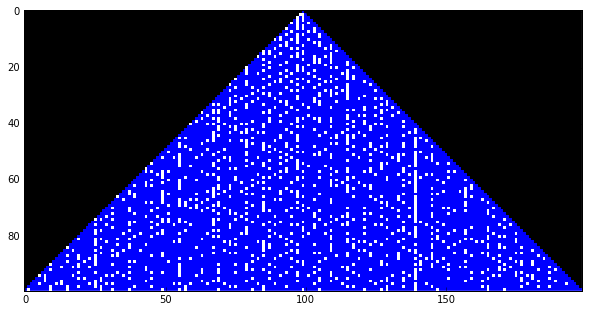

In [5]:
# create the triangle
m = klauber(100)

# create the colormap
cm = mpl.colors.ListedColormap(["black", "blue", "white"])

# plot the triangle
plt.imshow(m, interpolation='none', cmap = cm)
plt.show()

# Q2 (20): Interference pattern

Next, we will plot an image that displays a number of waves that display an interference pattern.

The first step is to define the function that will calculate the waves. Imagine a pond where a stone has been thrown into the water at a position $(x_s,y_s)$. From that position a wave will originate; the water level at a distance $d$ from the starting position is given by the formula $\sin(d)$.

- (10) Write a function "wave" that takes as inputs: (a) the tuple $(u,v)$ specifying where the stone hit the water, and (b) a tuple $(x,y)$ specifying the position where we want to know the height of the wave. The function should calculate the distance $d$ between the two positions using the Pythagorean theorem $d=\sqrt{(u-x)^2+(v-y)^2}$, and then evaluate the height of the wave using the formula given above. Hint: you can use `np.sqrt` and `np.sin`.

In [6]:
# in: a tuple uv specifying the position where the wave originates, and a tuple xy
# out: the height of the wave at position xy.
def wave(uv, xy):
    d = np.sqrt((uv[0]-xy[0])**2+(uv[1]-xy[1])**2)
    return np.sin(d);

- (10) Now write a function `renderwave` that renders this wave in a NumPy matrix. 

In [7]:
# in: an int n, a float scale and a tuple uv
# out: an n by n NumPy matrix that represents a region of the wave function
#      that ranges from (0,0) to (scale,scale).
#      That is: entry (r,c) of the matrix is set to wave(uv, (scale*c/n, scale*r/n))
    
def renderwave(n, scale, uv):
    m = np.empty([n,n]);
    for r in range(n):
        for c in range(n):
            m[r,c] = wave(uv, (scale*c/n, scale*r/n))
    return m

- (5) Render a wave originating at (20,40) on a 200 by 200 matrix, to a scale of 50, and plot the matrix using code similar to that used to plot the triangle above. Use `cmap='plasma'`.

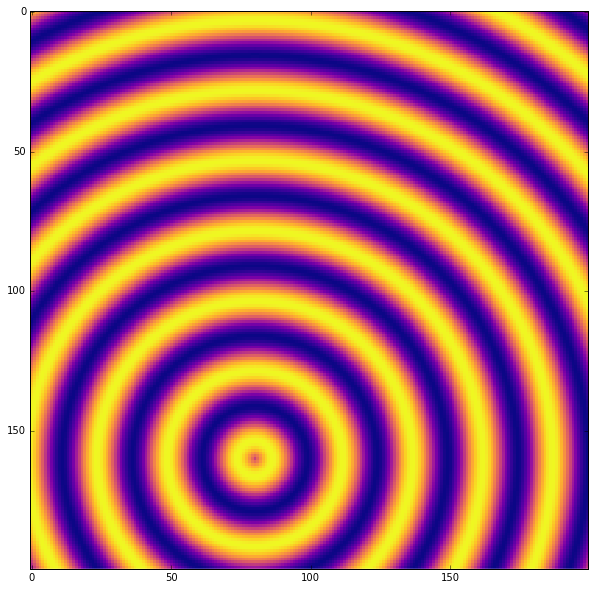

In [8]:
m = renderwave(200, 50, (20,40))
plt.imshow(m, interpolation='none', cmap = 'plasma')
plt.show()

- (10) Next, we will add several waves together. Write a function `renderwaves` in which the input `uv` is replaced by a *tuple* `uvs` of coordinates where stones hit the water. The matrix should then be filled by the *sum* of the waves of all these stones. 

In [9]:
# in: an int n, a float scale and a tuple uv
# out: an n by n NumPy matrix that represents a region of the wave function
#      that ranges from (0,0) to (scale,scale).
#      That is: entry (r,c) of the matrix is set to wave(uv, (scale*c/n, scale*r/n))
    
def renderwaves(n, scale, uvs):
    m = np.empty([n,n]);
    for r in range(n):
        for c in range(n):
            h = 0
            for uv in uvs:
                h += wave(uv, (scale*c/n, scale*r/n))
            m[r,c] = h
    return m

Test your function by plotting waves at (10,15), (30,10) and (10,40).

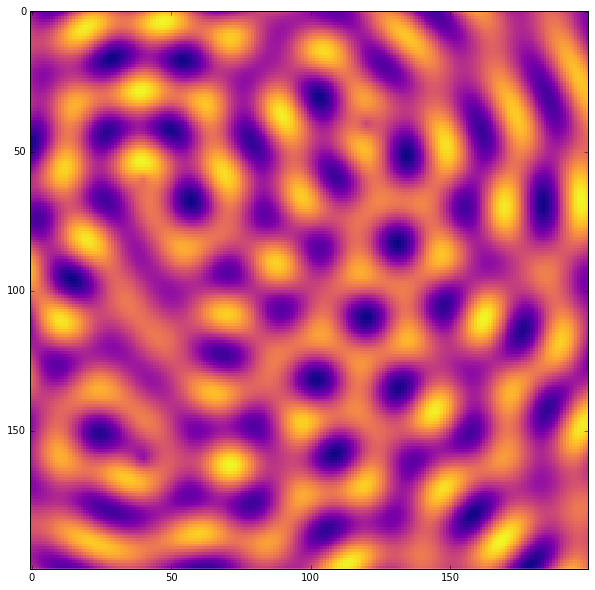

In [10]:
m = renderwaves(200, 50, ((10,15), (30,10), (10,40)))
plt.imshow(m, interpolation='none', cmap = 'plasma')
plt.show()

# Q3. Simulating water

We now modeled each of the waves explicitly. However, it is also possible to evaluate waves by  simulating the water surface directly. This works as follows:

- There are two matrices: `height` and `speed`. The former represents the water level at each position, like the matrix we generated in the previous question. The latter represents how quickly the water level *rises or falls* in any specific position.

- We will simulate the water level over several iterations.
  
  - Each iteration, the `speed` is updated based on the current heights of the water level. If the level at a particular position is *lower* than the level at its neighbouring positions, then the water level at that position will be accelerated upwards, so the `speed` at that position will increase. Vice versa, if a level at a particular position is *higher* than the level at its neighbouring positions, then the `speed` will decrease.
  
  - Also each iteration, the `height` is updated based on the currend speeds.
  
We will develop this simulation in steps.

- (10) Step 1: write a function `shiftright` that, given a NumPy matrix m, appends a column of zeros on the left and removes the rightmost column. For example, given a matrix

```
1 2 3
4 5 6
7 8 9
```

the function should yield a new matrix

```
0 1 2
0 4 5
0 7 8
```
Also write similar functions `shiftleft`, `shiftup` and `shiftdown`.

Hints: use `hstack` or `vstack`, `zeros` and use indexing to drop a row or column.

In [11]:
# in:  a matrix m
# out: the result of dropping the rightmost column of m,
#      and adding a column of zeroes on the left
def shiftright(m):
    return np.hstack((np.zeros([m.shape[0],1]), m[:,:-1]))

# analogous to shiftright, but shifts the matrix to the left
def shiftleft(m):
    return np.hstack((m[:,1:], np.zeros([m.shape[0],1])))

# analogous to shiftright, but shifts the matrix downward
def shiftdown(m):
    return np.vstack((np.zeros([1,m.shape[1]]), m[:-1,:]))

# analogous to shiftright, but shifts the matrix upward
def shiftup(m):
    return np.vstack((m[1:,:], np.zeros([1,m.shape[1]])))

- (10) Step 2: write a function `acceleration` that takes the height matrix as input, and calculates the *accelleration*: the difference between the height of each entry and the average height of its neighbours. This can be done by taking the average of the shifted versions of the matrix, and then subtracting the original height matrix from that.

In [12]:
# in: a height matrix m
# out: a matrix q such that q[r,c] is the average of the four cells neighbouring m[r,c],
#      minus m[r,c] itself. Neighbours outside the range of the matrix count as zero.
def acceleration(m):
    return 0.25*(shiftleft(m)+shiftright(m)+shiftup(m)+shiftdown(m))-m

- (10) Step 3: Create a function `simwater` that, given initial `height` and `speed` matrices and a requested number of iterations, performs the simulation as follows:
  - Repeat for the given number of iterations:
    - Calculate the acceleration
    - Add the acceleration divided by 100 to the speed.
    - Add the speed matrix to the height matrix.
  - Return the updated `height` and `speed` matrices.

In [13]:
# in: matrices "height" and "speed" of the same size, and the number of iterations
# out: a tuple (height,speed) containing the height and speed matrices after running
#      the simulation for the requested number of iterations.
def simwater(height, speed, niter):
    for i in range(500):
        acc = acceleration(height)
        speed += 0.03*acc
        height += speed
    return (height, speed)

- (10) Step 4: Initialise 200 by 200 `height` and `speed` matrices to zero. Set the heights at positions (60,80), (140,100) and (90,140) to 1 (these are some initial disturbances of the water surface). Then run the simulation for 1000 iterations. Plot the results as before.

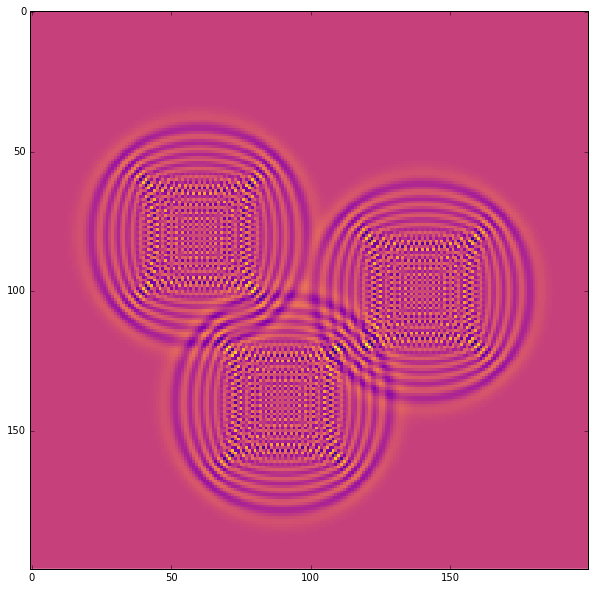

In [14]:
n = 200
height = np.zeros([n,n])
speed = np.zeros([n,n])
for (x,y) in ((60,80), (140,100), (90,140)):
    height[y,x] = 1

(height,speed) = simwater(height, speed, 1000)
plt.imshow(height, interpolation='none', cmap = 'plasma')
plt.show()